![header](https://i.imgur.com/I4ake6d.jpg)

# IN SITU BLACK SEA TRAINING

<div style="text-align: right"><i> 13-05-Part-three-out-of-five </i></div>

# BS `NRT` product/dataset: managing files (Moorings)

***

<h1>Table of Contents<span class="tocSkip"></h1>
<div class="toc">
    <ul class="toc-item">
        <li><span><a href="#Introduction" data-toc-modified-id="Introduction">Introduction</a></span></li>
        <li>
            <span><a href="#Setup" data-toc-modified-id="Setup">Setup</a></span>
            <ul>
                <li><span><a href="#Python-packages" data-toc-modified-id="Python-packages">Python packages</a></span></li>
            </ul>
        </li>
        <li><span><a href="#Moorings-(MO)-data" data-toc-modified-id="Moorings-(MO)-data">Moorings (MO) data</a></span>
            <ul>
                <li><span><a href="#Reading-file" data-toc-modified-id="Reading-file">Reading file</a></span></li>
                <li><span><a href="#Subsetting-Operations" data-toc-modified-id="Subsetting-Operations">Subsetting Operations</a></span>
                <li><span><a href="#Sampling-Operations" data-toc-modified-id="Sampling-Operations">Sampling Operations</a></span>
                    <ul>
                        <li><span><a href="#Selecting-Good-data-(QC-flags)" data-toc-modified-id="Selecting-Good-data-(QC-flags)">Selecting Good data (QC flags)</a></span></li>
                        <li><span><a href="#Upsampling/Downsampling" data-toc-modified-id="Upsampling/Downsampling">Upsampling/Downsampling</a></span></li>
                    </ul>
                </li>
        <li><span><a href="#Exporting-data-to-excel" data-toc-modified-id="Exporting-data-to-excel">Exporting data to excel</a></span></li>
            </ul>
        </li>
        <li><span><a href="#Wrap-up" data-toc-modified-id="Wrap-up">Wrap-up</a></span></li>
        <li><span><a href="#Feedback-survey" data-toc-modified-id="Feedback-survey">Feedback survey</a></span></li>
    </ul>
</div>

***

## Introduction

According to the [13-01-NearRealTtime-product-collections-overview.ipynb](13-01-NearRealTtime-product-collections-overview.ipynb) one of the two most common data source types available are the Moorings, Profilers, Tide Gauges and Drifters. Please use the notebook [13-02-NearRealTtime-product-subsetting-download](13-02-NearRealTtime-product-subsetting-download.ipynb) to download some files from Moorings ('MO' data type) and let's check its data. If you wanna skip the downloading part you can use the netCDF files available <a href="data" target="_blank">here</a> instead.  

## Setup

### Python packages

For the notebook to properly run we need to first load the next packages available from the Jupyter Notebook Ecosystem. Please run the `next cell`:

In [508]:
import warnings
warnings.filterwarnings("ignore")

import IPython
import datetime
import pandas as pd
import os
import xarray
import matplotlib.pyplot as plt
import folium
%matplotlib inline

<div class="alert alert-block alert-warning">
<b>WARNING</b>
    
***  
If any of them raises any error it means you need to install the module first. For doing so please:
1. Open a new cell int he notebook
2. Run <i>`!conda install packageName --yes`</i> or <i>`!conda install -c conda-forge packageName --yes`</i> or <i>`!pip install packageName`</i>
3. Import again!
<br><br>
Example: <i>how-to-solve import error for json2html module </i>

![region.png](img/errorImporting.gif)

## Mooring (MO) data

Moorings are fixed platforms (i.e ocenographic buoys) measuring a number of oceanographic variables over time.<br>
Let's see the data of one of the available moorings in the BS. 

### Reading file

`Run the next cell` to see the tide gauges files already available in the /data folder:

In [509]:
IPython.display.IFrame('http://localhost:8888/tree/data/files/MO', width='100%', height=350)

`Set one` of the above available `file name` and `run the next cells`:

In [510]:
file = 'BS_TS_MO_EUXRo03.nc'
path = os.path.join(os.getcwd(), 'data','files','MO', file)

In [511]:
ds = xarray.open_dataset(path)
ds.close()
ds

<xarray.Dataset>
Dimensions:      (DEPTH: 3, LATITUDE: 53202, LONGITUDE: 53202, POSITION: 53202, TIME: 53202)
Coordinates:
  * TIME         (TIME) datetime64[ns] 2014-01-01 ... 2020-03-31T23:00:00.000003328
  * LATITUDE     (LATITUDE) float32 43.98 43.98 43.98 ... 43.98 43.98 43.98
  * LONGITUDE    (LONGITUDE) float32 29.936 29.936 29.936 ... 29.936 29.936
Dimensions without coordinates: DEPTH, POSITION
Data variables:
    TIME_QC      (TIME) float32 ...
    POSITION_QC  (POSITION) float32 ...
    DEPH         (TIME, DEPTH) float32 ...
    DEPH_QC      (TIME, DEPTH) float32 ...
    TEMP         (TIME, DEPTH) float64 ...
    TEMP_QC      (TIME, DEPTH) float32 ...
    PSAL         (TIME, DEPTH) float64 ...
    PSAL_QC      (TIME, DEPTH) float32 ...
    FLU2         (TIME, DEPTH) float64 ...
    FLU2_QC      (TIME, DEPTH) float32 ...
    OSAT         (TIME, DEPTH) float64 ...
    OSAT_QC      (TIME, DEPTH) float32 ...
    DOXY         (TIME, DEPTH) float64 ...
    DOXY_QC      (TIME, DEPT

The above one is an overview of the content of the file: variables, dimensions, coordinates, global attributes...
<br>i.e We are able to know already the platform last position. Let's draw it on a map: `run the next cell`

In [512]:
m = folium.Map(
    location=[ds.attrs['last_latitude_observation'],ds.attrs['last_longitude_observation']],
    zoom_start=6
)
tooltip = ds.platform_code
folium.Marker([float(ds.last_latitude_observation), float(ds.last_longitude_observation)], tooltip=tooltip).add_to(m)
m

<div class="alert alert-block alert-warning">
<b>WARNING</b>
    
***  
If you do not see any map when running the next cell please change your navigator (try chrome!).

<br>Let's list now the available variables: `run the next cell`

In [505]:
for var in ds.variables:
    print(var + ':' + ds[var].attrs['long_name'])

TIME:Time
TIME_QC:quality flag
LATITUDE:Latitude of each location
LONGITUDE:Longitude of each location
POSITION_QC:quality flag
DEPH:Depth
DEPH_QC:quality flag
TEMP:Sea temperature
TEMP_QC:quality flag
PSAL:Practical salinity
PSAL_QC:quality flag
FLU2:Chlorophyll-a fluorescence
FLU2_QC:quality flag
OSAT:Oxygen saturation
OSAT_QC:quality flag
DOXY:Dissolved oxygen
DOXY_QC:quality flag
TUR4:Turbidity
TUR4_QC:quality flag
HCDT:Current to direction relative true north
HCDT_QC:quality flag
HCSP:Horizontal current speed
HCSP_QC:quality flag
RELH:Relative humidity
RELH_QC:quality flag
ATMS:Atmospheric pressure at sea level
ATMS_QC:quality flag
DRYT:Air temperature in dry bulb
DRYT_QC:quality flag
WSPD:Horizontal wind speed
WSPD_QC:quality flag
WDIR:Wind from direction relative true north
WDIR_QC:quality flag
GSPD:Gust wind speed
GSPD_QC:quality flag


Let's focus on one of the parameters `run he next cell` to see its attributes:

In [506]:
param = 'TEMP'
ds[param][:,2]

<xarray.DataArray 'TEMP' (TIME: 53202)>
array([9.29 , 9.323, 9.31 , ..., 8.708, 8.713, 8.724])
Coordinates:
  * TIME     (TIME) datetime64[ns] 2014-01-01 ... 2020-03-31T23:00:00.000003328
Attributes:
    long_name:      Sea temperature
    standard_name:  sea_water_temperature
    units:          degrees_C

Let's have  a look to the whole parameter time serie: `run the next cell`

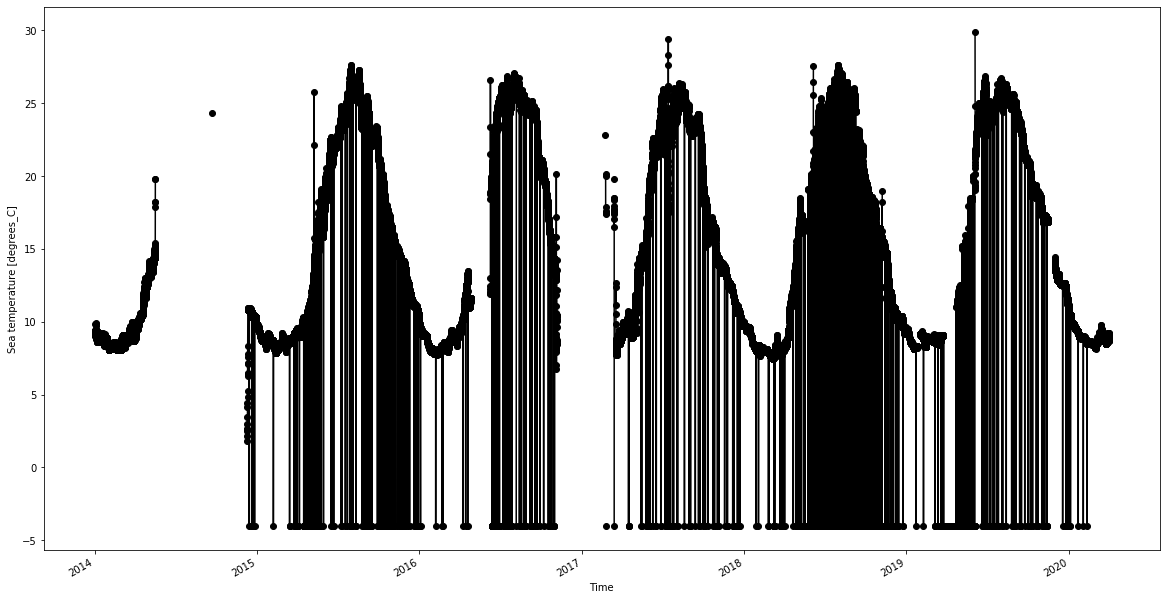

In [507]:
ds[param][:,2].plot(aspect=2, size=10, color='k', marker='o')

### Subsetting Operations

Let's select an specific time range:

In [471]:
start = '2019-01-01'
end = '2019-12-30'

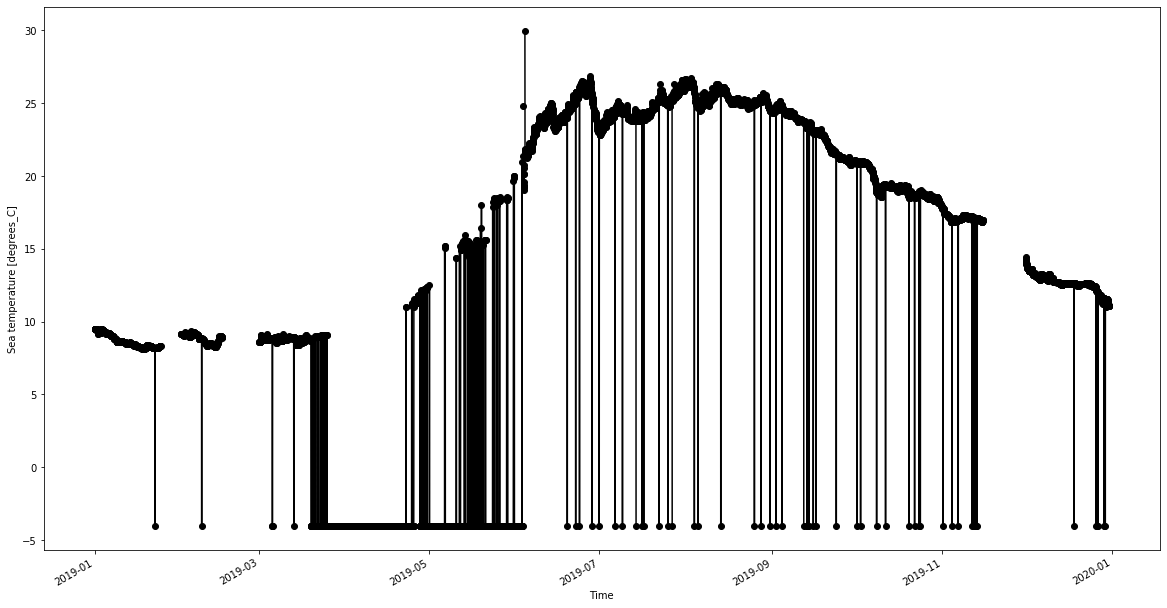

In [472]:
subset = ds[param][:,2].sel(TIME=slice(start, end))
subset.plot(aspect=2, size=10, color='k', marker='o')

### Sampling Operations

We will upsample and downsample the above serie subset, not the original one, to better see the diferences.

#### Selecting Good data (QC flags)

Is it there any bad data in the above time serie? `Run the next cell`to check the quality flags assigned to the parameter:

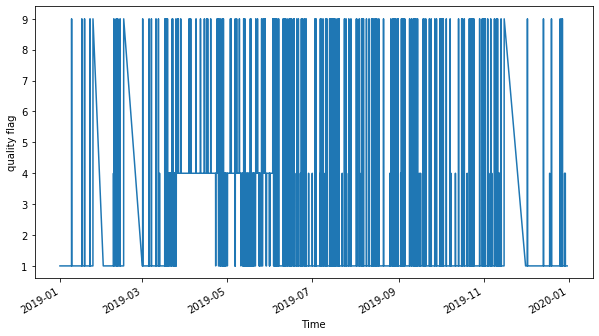

In [473]:
subset_QC = ds[param+'_QC'][:,2].sel(TIME=slice(start, end))
subset_QC.plot(aspect=2, size=5)

All In Situ TAC variables are linked to another called the same plus '_QC'. This 'twin' variable contains a quality flag for each value in the paired variable. <br>
Let's check all posible 'QC' values: `run the next cell`

In [474]:
pd.DataFrame(data=ds[param+'_QC'][:,2].attrs['flag_values'],
             index=ds[param+'_QC'][:,2].attrs['flag_meanings'].split(' '), 
             columns=['quality flag'])

,quality flag
no_qc_performed,0
good_data,1
probably_good_data,2
bad_data_that_are_potentially_correctable,3
bad_data,4
value_changed,5
not_used,6
nominal_value,7
interpolated_value,8
missing_value,9


From the above list, users are recommended to use only the data flagged as 1; so that, when working with any of the variables, we will perfom first a data cleaning to use only the 'good data'.

If we wanted to do so (only if in the plot above we saw values different from 1 the operation would be:

In [475]:
subset_good = subset.where(subset_QC == 1)

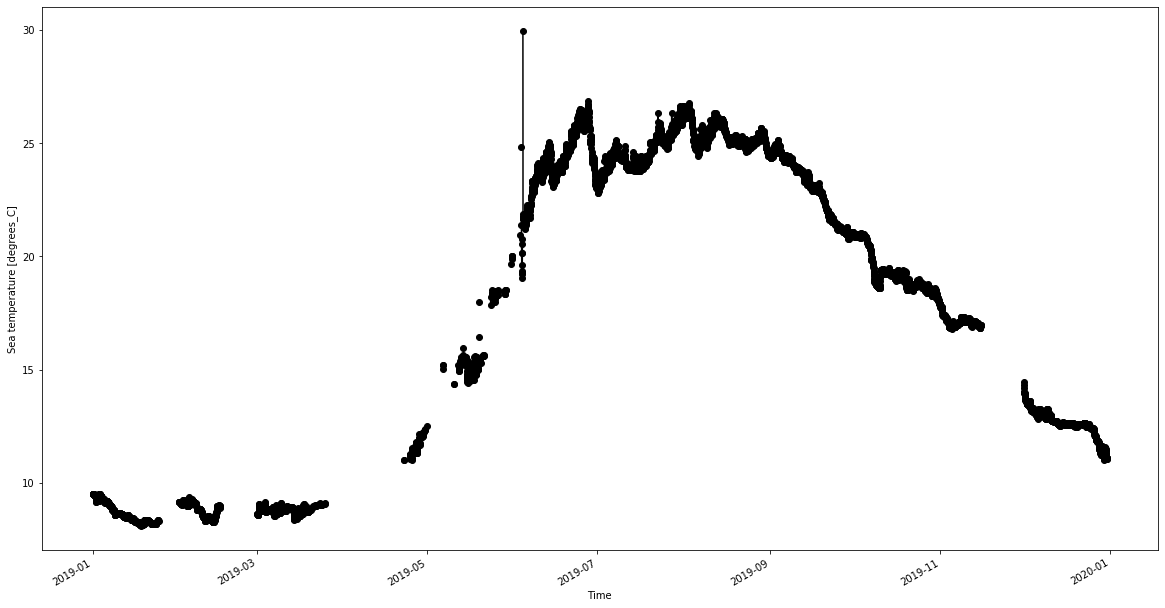

In [476]:
subset_good.plot(aspect=2, size=10, color='k', marker='o')

#### Upsampling/Downsampling

<ul> <li>Downsamplig </li></ul>
Let's see next a downsampling example; this is, retrieveing less observations in a given period by agregating some-how <i>i.e mean of the original number of observations</i>. Let's get, by averaging, a mothly resolution sampling: `run the next cell`

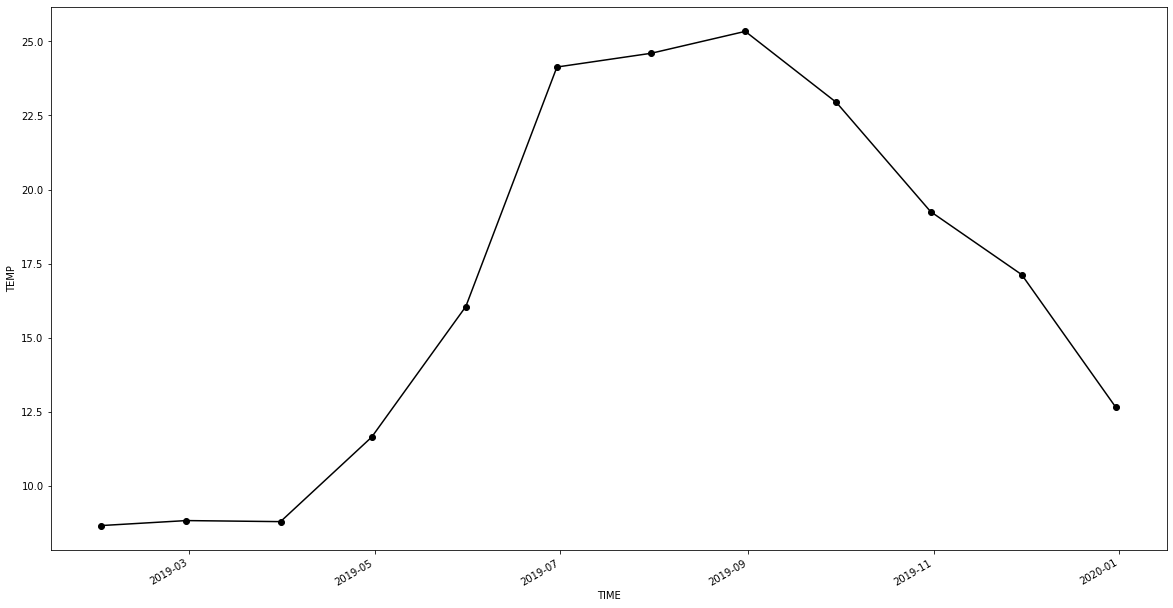

In [477]:
(subset_good.resample(TIME='1M').mean()).plot(aspect=2, size=10, color='k', marker='o')

<ul><li>Upsampling</ul></li>

Let's see next a upsampling example; this is, retrieveing more observations in a given period by inferring new ones some-how i.e <i>interpolating the original number of observations</i>. Let's get, by interpolating, a 10 minute resolution instead:

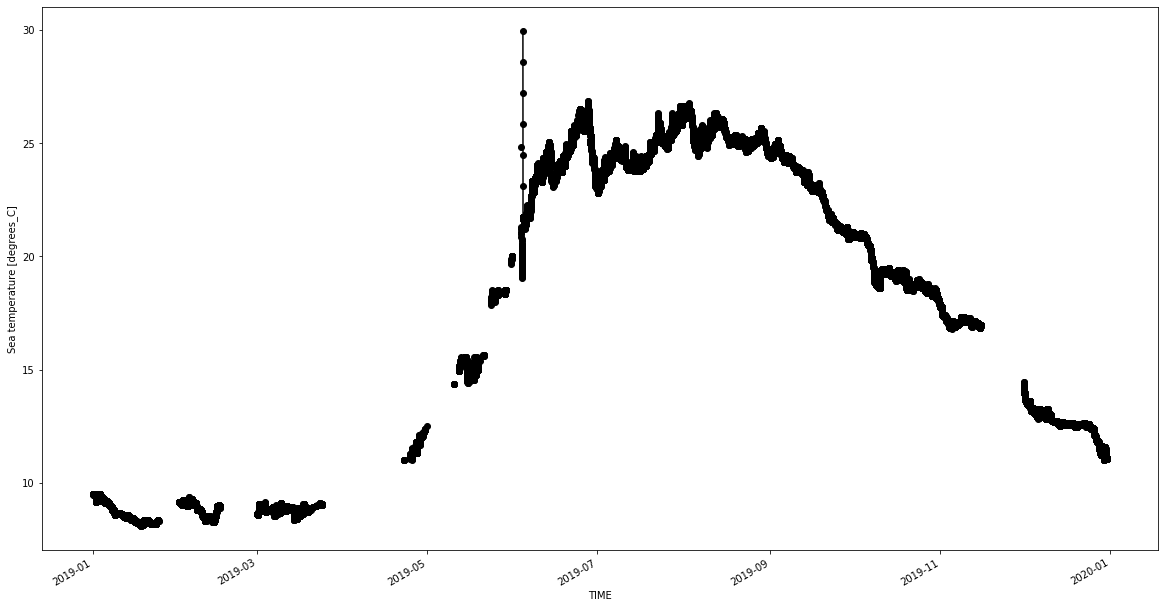

In [478]:
(subset_good.resample(TIME='10Min').interpolate('linear')).plot(aspect=2, size=10, color='k', marker='o')

### Exporting data to excel

Let's export the full serie to excel.

1) `run the next cell` to create a dataframe:

In [479]:
dataframe = subset_good.to_dataframe()
dataframe

,TEMP
TIME,
2019-01-01 00:00:00.000000000,9.528000
2019-01-01 00:59:59.999996672,9.523000
2019-01-01 02:00:00.000003328,9.521000
2019-01-01 03:00:00.000000000,9.529000
2019-01-01 03:59:59.999996672,9.520000
...,...
2019-12-30 18:59:59.999996672,11.096001
2019-12-30 20:00:00.000003328,11.058001
2019-12-30 21:00:00.000000000,11.067001


2) `run the next cell` to reset the time axis to readable dates

In [490]:
df_with_readable_time = dataframe.set_index(dataframe.index.astype(str).str[:19])
df_with_readable_time

,TEMP
TIME,
2019-01-01 00:00:00,9.528000
2019-01-01 00:59:59,9.523000
2019-01-01 02:00:00,9.521000
2019-01-01 03:00:00,9.529000
2019-01-01 03:59:59,9.520000
...,...
2019-12-30 18:59:59,11.096001
2019-12-30 20:00:00,11.058001
2019-12-30 21:00:00,11.067001


3) Exporting dataframe to excel: `run the next cells`!

In [492]:
out_put_dir = os.getcwd() #by default: current working directory. Set a different path if you want

In [493]:
file_name = ds.attrs['platform_code']+'_time_serie.xlsx'
file_name

'EUXRo03_time_serie.xlsx'

In [494]:
df_with_readable_time.to_excel(os.path.join(out_put_dir, file_name))

<div class="alert alert-block alert-info" style="margin-left: 2em">
<b>TIP</b>
    
***  
Check your output directory for the file exported and inspect the content!.

---



## Wrap-up

So far you should already know how to deal with Time Serie data from fixed platforms (tide gauges, moorings, river flows...).<br> `If you don't please ask us! it is the moment!`

***

## Feedback survey

<div class="alert alert-block alert-success">
    <b>CONGRATULATIONS</b><br>

***
**IF IT'S 202025, PLEASE READ CAREFULLY BELOW LINES (ACTION FROM YOUR SIDE)**
***    
This training course is over but we'd love to hear from you about how we could improve it (topics, tools, storytelling, format, speed etc). 

We have prepared a little questionnaire to gather all your inputs, available here (just click on the hyperlink or execute the very last cell and click on `Answer`):
- https://tiny.cc/training-blk-insitu

We do thank you in advance for your kind collaboration :)

Greetings <3

In [ ]:
from IPython.display import IFrame
IFrame('https://tiny.cc/training-blk-insitu', width=900, height=500)